<a href="https://colab.research.google.com/github/Andrie-wicaksono/Python-/blob/main/Tubes_SKO_Mochammad_Andrie_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochammad Andrie Wicaksono

Kelas : TT-42-07

NIM : 1101184347

Tugas Besar SKO mengenai perencangan FTTB dari sentral menuju ODC menuju ONU menuju ODP kemudian ke roset yang berada disetiap kamar. Gedung berisi 40 lantai dengan jumlah kamar per lantainya 20. Menggunakan fiber jenis G625D dengan panjang 1490 nm dan redaman 0.28 dB

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

konversi Numerik to Logaritmik dan Logaritmik to Numerik

In [29]:
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

Parameter

In [30]:
#tinggi setiap lantai 5m
#jarak sental ke ONU 17 km
#jarak ONU ke roset >500m bisa didapatkan 5*33(lantai) = 165 m = 0.165 km

d = np.arange(0.165,17.165,1) #jarak total (km)
n_splicer = 8 #jumlah splicer
l_splicer = 0.1 #loss splicer (dB)
n_konektor = 6 #jumlah konektor
l_konektor = 0.3 #loss konektor (dB)
l_fiber = 0.28 #loss jenis fiber (dB)
l_splitter = 16 + 19.5 #loss dari splitter
SM = 6 #Safety Margin (dB)
Pt = 3 #daya tx (dBm)


R = 0.85 # Responsivitas (A/W)
M = -0.3 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
K = 1.38 * 10**-23 #Konstanta Boltzmann
Temp= 290 #Kelvin
B = 7 * 10**9 # Bandwith 7 Ghz 
Req = 50 # Resistensi Ekivalensi
id = 60*10**-9 #Arus gelap(A)
F = 1 #F(M), Faktor Gain


Rumus Daya Terima

In [31]:
def P_receive():
  hambatan_fiber = d * l_fiber
  hambatan_splicer = n_splicer * l_splicer
  hambatan_connector = n_konektor * l_konektor

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + l_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr) #logaritmik

Daya Terima =  [-41.1462 -41.4262 -41.7062 -41.9862 -42.2662 -42.5462 -42.8262 -43.1062
 -43.3862 -43.6662 -43.9462 -44.2262 -44.5062 -44.7862 -45.0662 -45.3462
 -45.6262]


Rumus Arus Primer

In [32]:
def arus_primer():
  Prnum = LtN(Pr)
  ip = R * Prnum
  return ip
ip = arus_primer()
print('Arus Primer = ',ip,'Watt')


Arus Primer =  [6.52828229e-05 6.12066945e-05 5.73850713e-05 5.38020626e-05
 5.04427698e-05 4.72932245e-05 4.43403305e-05 4.15718092e-05
 3.89761489e-05 3.65425564e-05 3.42609125e-05 3.21217299e-05
 3.01161135e-05 2.82357238e-05 2.64727419e-05 2.48198370e-05
 2.32701362e-05] Watt


Signal Power

In [33]:
def signal_power():
  sigpow = (ip*M)**2
  return sigpow
signal = signal_power()
print('Signal = ',signal, 'A')


Signal =  [3.83566227e-10 3.37163350e-10 2.96374177e-10 2.60519575e-10
 2.29002572e-10 2.01298418e-10 1.76945842e-10 1.55539379e-10
 1.36722616e-10 1.20182258e-10 1.05642911e-10 9.28624978e-11
 8.16282265e-11 7.17530491e-11 6.30725458e-11 5.54421880e-11
 4.87349316e-11] A


Perhitungan Noise Power

In [34]:
def noise_power():
  BDC = 2*q*id*B*(M**2)*F #Dark Current
  SNC = 2*q*ip*B*(M**2)*F #Short Noise Current
  NT =  (4*K*Temp*B)/Req #Derau Thermal
  noise_rumus = BDC + SNC + NT
  return noise_rumus
noise = noise_power()
print('Noise = ',noise,'A')

Noise =  [2.25429311e-12 2.25347137e-12 2.25270093e-12 2.25197859e-12
 2.25130136e-12 2.25066641e-12 2.25007111e-12 2.24951297e-12
 2.24898969e-12 2.24849908e-12 2.24803910e-12 2.24760784e-12
 2.24720350e-12 2.24682442e-12 2.24646900e-12 2.24613578e-12
 2.24582336e-12] A


Perhitungan SNR

In [35]:
def snr():
  snr = signal/noise
  snr_dB = NtL(snr)
  return snr_dB
SNR = snr()
print('SNR = ',SNR,'dBm')

SNR =  [22.30829977 21.74988317 21.19136823 20.63276103 20.07406727 19.51529231
 18.95644118 18.39751859 17.83852897 17.27947648 16.72036501 16.16119823
 15.60197957 15.04271226 14.48339931 13.92404356 13.36464767] dBm


Perhitungan Q

In [36]:
def Q_rumus():
  Q_rum = 0.5*(10**(SNR/20))
  return Q_rum
Q = Q_rumus()
print(Q)

[6.52206305 6.11595333 5.73506594 5.37784222 5.04281886 4.72862224
 4.43396299 4.15763092 3.89849025 3.65547508 3.42758517 3.21388192
 3.01348465 2.82556705 2.64935387 2.48411777 2.32917644]


Perhitungan BER

In [37]:
kali_list = []
def BER_rumus():
  akr = (m.sqrt(2*m.pi) * Q)
  #exp = (m.exp(Q/2)**2)/Q
  #B= akr * exp
  for i in range(len(Q)):
    kali = m.exp(-(Q[i]/2)**2)
    kali_list.append(kali)
  B = (1/akr) * (kali_list)
  return B
B = BER_rumus()
print(B)

[1.47263702e-06 5.66581120e-06 1.86757788e-05 5.37308908e-05
 1.37153577e-04 3.15125536e-04 6.60020782e-04 1.27430076e-03
 2.29027253e-03 3.86501729e-03 6.17109161e-03 9.38467441e-03
 1.36733300e-02 1.91854157e-02 2.60425563e-02 3.43358120e-02
 4.41254310e-02]


GRAFIK

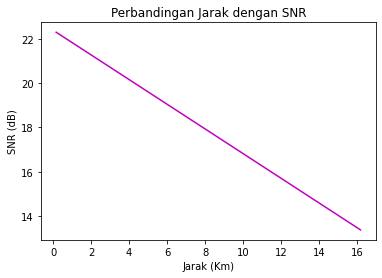

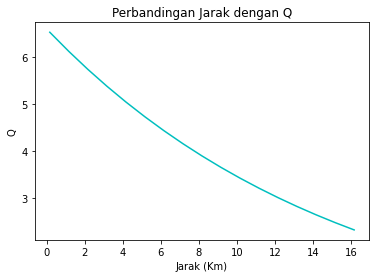

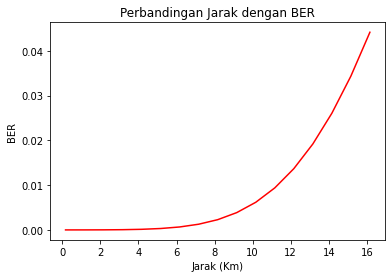

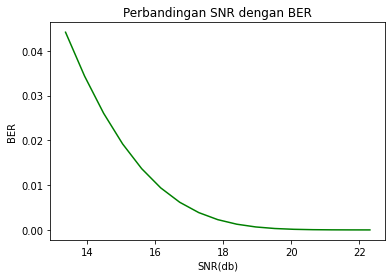

In [38]:
def grafik_snr():
  plt.figure()
  plt.plot(d,SNR,'m')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_Q():
  plt.figure()
  plt.plot(d,Q,'c')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_BER():
  plt.figure()
  plt.plot(d,B,'r')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_BER_SNR():
  plt.figure()
  plt.plot(SNR,B,'g')
  plt.title('Perbandingan SNR dengan BER')
  plt.xlabel('SNR(db)')
  plt.ylabel('BER')
  plt.show()

grafik_snr()
grafik_Q()
grafik_BER()
grafik_BER_SNR()